#Preprocess

##Installing Library

In [10]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

##Fethcing Data from Kaggle 

In [33]:
! pip install -q kaggle

In [37]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [38]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [39]:
! cp kaggle.json ~/.kaggle/

In [40]:
! chmod 600 ~/.kaggle/kaggle.json

In [41]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           6598        200  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts            McDonald's India : Menu Nutrition Dataset             5KB  2022-07-28 17:08:52           5152        181  0.9411765        
arianazmoudeh/airbnbopendata                                   Airbnb Open Data                                     10MB  2022-08-01 15:58:10           3372        103  0.9705882        
iamsouravbanerjee/world-population-dataset                     Wo

In [42]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d iamhungundji/dysarthria-detection # dataset API Command

 99% 154M/155M [00:01<00:00, 101MB/s]
100% 155M/155M [00:01<00:00, 102MB/s]


In [43]:
!unzip dysarthria-detection.zip

Archive:  dysarthria-detection.zip
  inflating: torgo_data/data.csv     
  inflating: torgo_data/dysarthria_female/F01_Session1_0001.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0002.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0004.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0006.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0007.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0008.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0013.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0015.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0017.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0018.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0021.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0022.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0024.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0026.wav  
  i

##1. Read the Data

###Read Data

In [44]:
df = pd.read_csv("/content/torgo_data/data.csv")
print(df.shape)

(2000, 3)


In [45]:
df

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...
...,...,...,...
1995,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0144.wav
1996,dysarthria,male,torgo_data/dysarthria_male/M02_Session1_0005.wav
1997,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0040.wav
1998,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0260.wav


In [46]:
dir_ = "/content/"

df['filename'] = dir_ + df['filename']

In [47]:
df

,is_dysarthria,gender,filename
0,non_dysarthria,female,/content/torgo_data/non_dysarthria_female/FC03...
1,non_dysarthria,female,/content/torgo_data/non_dysarthria_female/FC02...
2,non_dysarthria,female,/content/torgo_data/non_dysarthria_female/FC02...
3,non_dysarthria,female,/content/torgo_data/non_dysarthria_female/FC03...
4,non_dysarthria,female,/content/torgo_data/non_dysarthria_female/FC03...
...,...,...,...
1995,dysarthria,male,/content/torgo_data/dysarthria_male/M03_Sessio...
1996,dysarthria,male,/content/torgo_data/dysarthria_male/M02_Sessio...
1997,dysarthria,male,/content/torgo_data/dysarthria_male/M03_Sessio...
1998,dysarthria,male,/content/torgo_data/dysarthria_male/M03_Sessio...


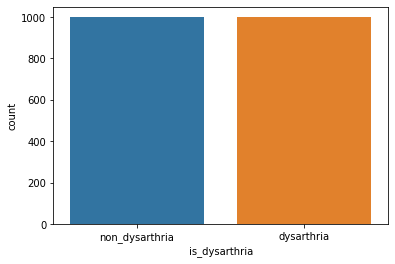

In [48]:
sns.countplot(x=df['is_dysarthria'])

###Define the functions

In [49]:
#Waveplot
def get_waveplot(path, target, gender):
    x, sr = librosa.load(path)
    plt.figure(figsize=(20,5))
    librosa.display.waveshow(x, sr=sr)
    plt.title("Target: " + target + " " + "Gender: " + gender)
    plt.show()

In [50]:
#Mel-Frequency Cepstral Coefficient -> 128 coeffs
def get_mfcc(path, target, gender):
    x, sr = librosa.load(path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
    print(mfccs.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.title('MFCC of '+ target + " " + gender)
    plt.show()

In [51]:
#Mel-Spectrogram -> 128 bands
def get_melspec(path, target, gender):
    x, sr = librosa.load(path)
    melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
    print(melspec.shape)
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(melspec, sr=sr, x_axis='time')
    plt.title('Mel Spectrogram of '+ target + ' ' + gender)
    plt.show()


#2.Visualizing 

2.1. waveplot

2.2. MFCC

2.3. Mel Spectrogram

##Waveplot

1. **Female & dysarthria**
2. **Male & Dysarthria**
3. **Female & Non-Dysarthria**
4. **Male & Non-Dysarthria**

###1. **Female & dysarthria**


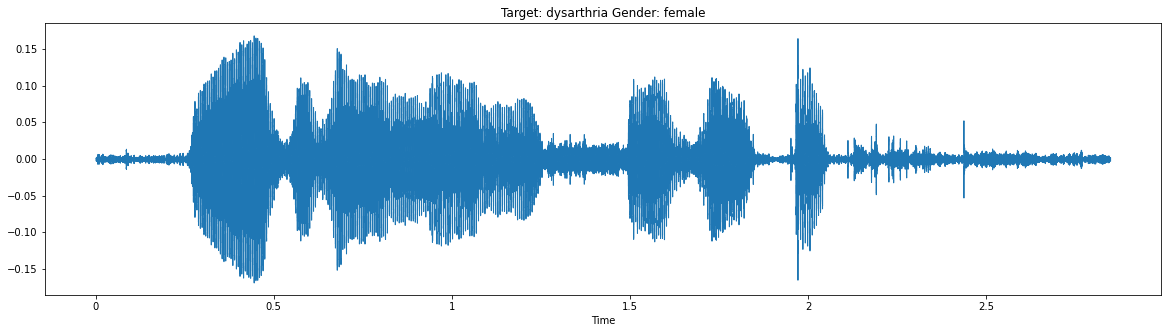

In [58]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')] 
get_waveplot(sample['filename'].values[30], sample['is_dysarthria'].values[30], sample['gender'].values[30])
ipd.Audio(sample['filename'].values[30])

###2. **Male & Dysarthria**


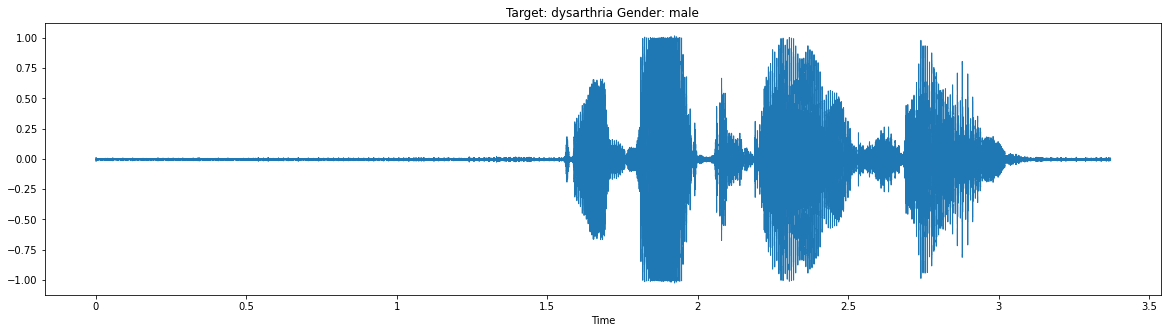

In [59]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')] 
get_waveplot(sample['filename'].values[30], sample['is_dysarthria'].values[30], sample['gender'].values[30])
ipd.Audio(sample['filename'].values[30])

###3. **Female & Non-Dysarthria**

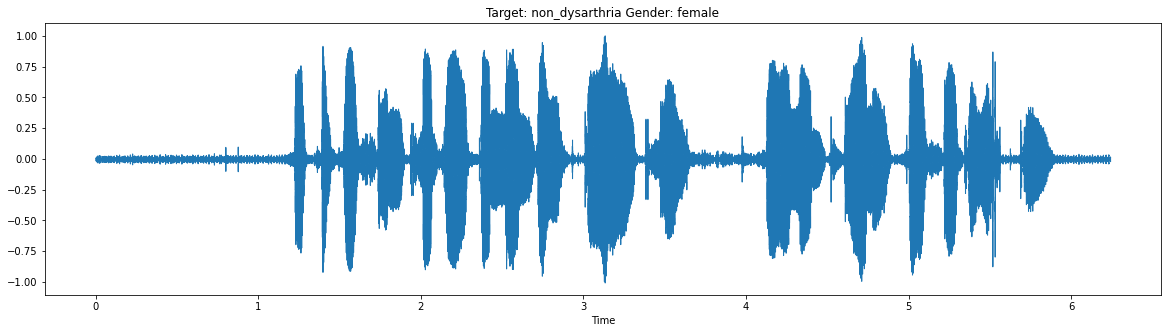

In [60]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')] 
get_waveplot(sample['filename'].values[30], sample['is_dysarthria'].values[30], sample['gender'].values[30])
ipd.Audio(sample['filename'].values[30])

###4. **Male & Non-Dysarthria**

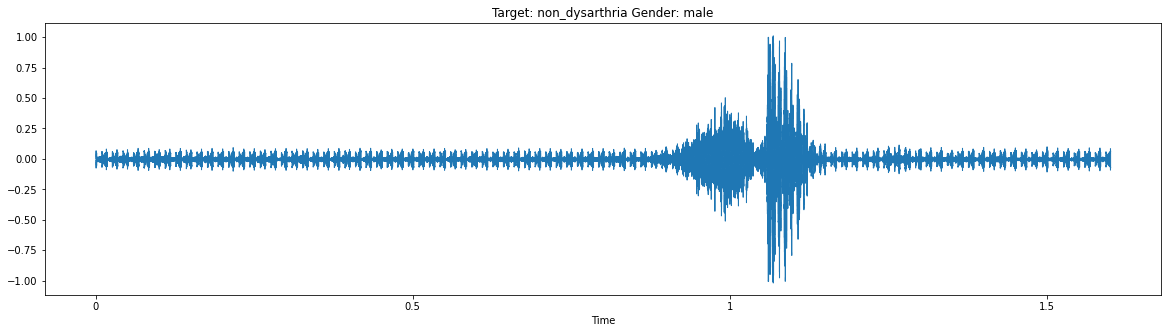

In [61]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')] 
get_waveplot(sample['filename'].values[30], sample['is_dysarthria'].values[30], sample['gender'].values[30])
ipd.Audio(sample['filename'].values[30])

##MFCC
1. **Female & dysarthria**
2. **Male & Dysarthria**
3. **Female & Non-Dysarthria**
4. **Male & Non-Dysarthria**

(128, 123)


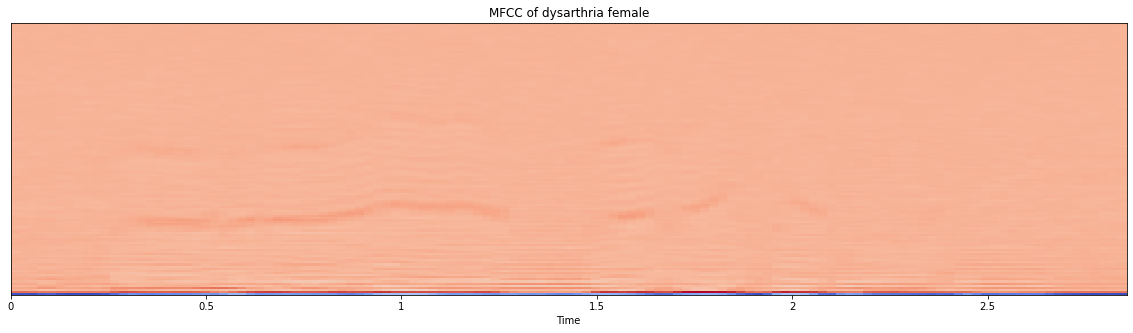

(128, 146)


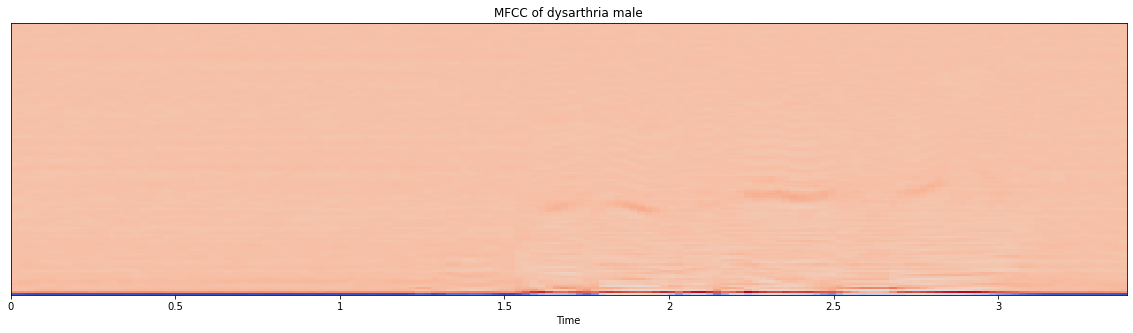

(128, 269)


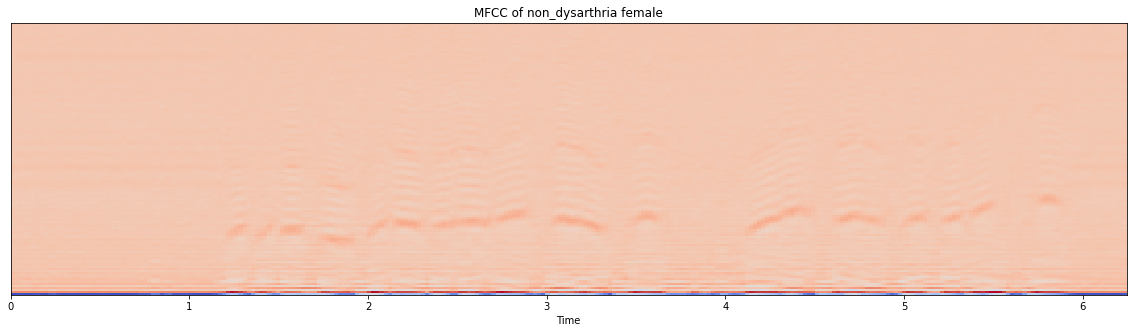

(128, 69)


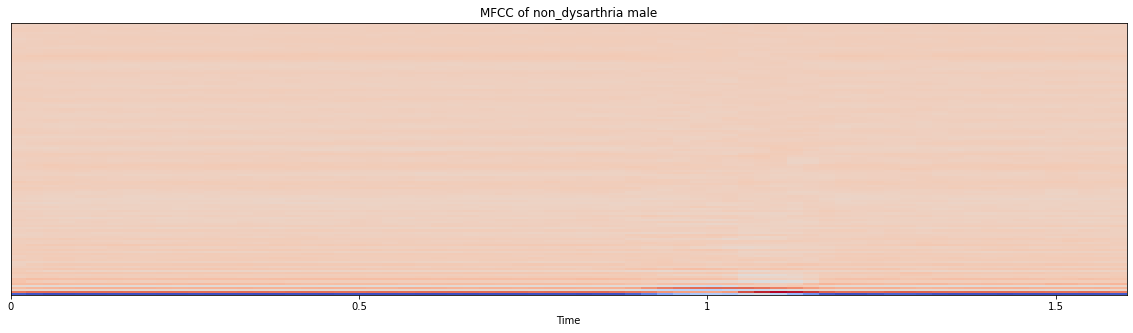

In [62]:
for i in np.unique(df['is_dysarthria']):
    for j in np.unique(df['gender']):
        sample = df[(df['is_dysarthria']==i) & (df['gender']==j)] 
        get_mfcc(sample['filename'].values[30], sample['is_dysarthria'].values[30], sample['gender'].values[30])

##Mel Spectrogram

(128, 123)


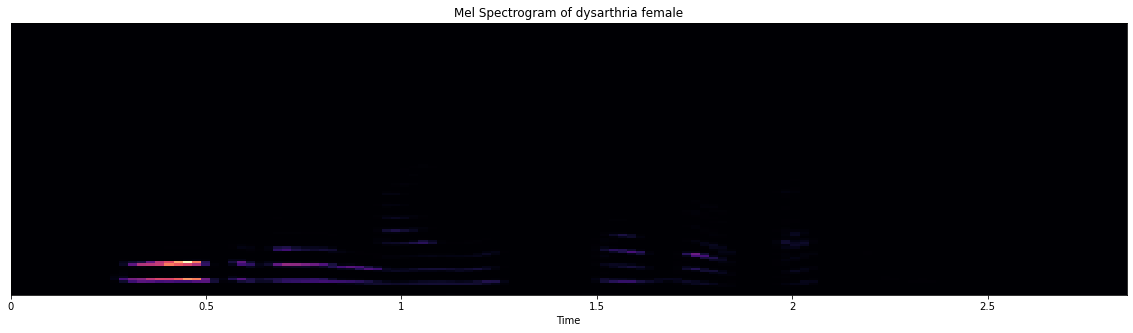

(128, 146)


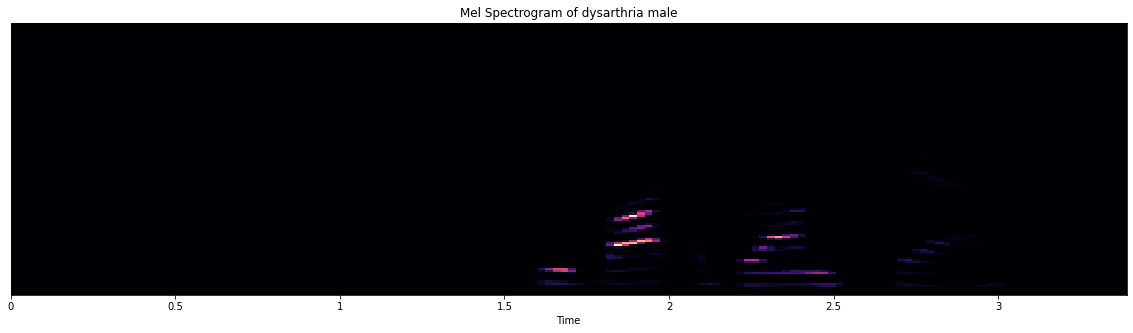

(128, 269)


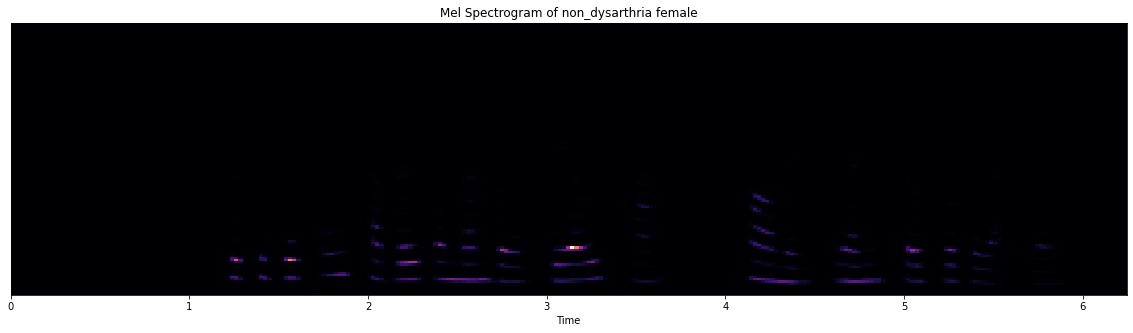

(128, 69)


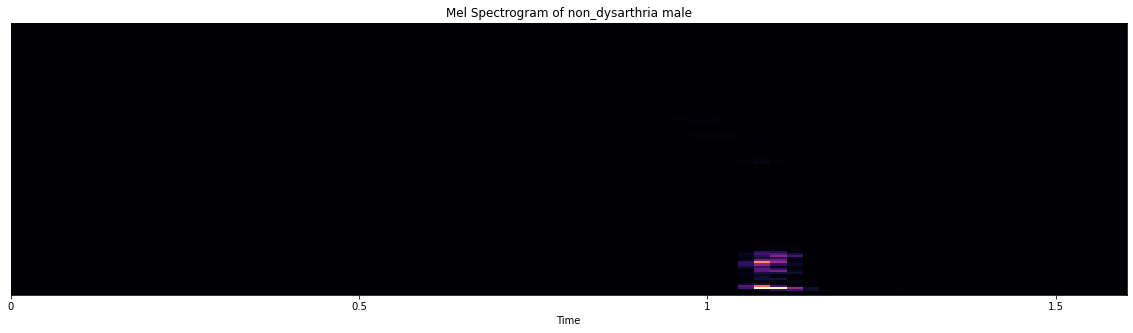

In [63]:
for i in np.unique(df['is_dysarthria']):
    for j in np.unique(df['gender']):
        sample = df[(df['is_dysarthria']==i) & (df['gender']==j)] 
        get_melspec(sample['filename'].values[30], sample['is_dysarthria'].values[30], sample['gender'].values[30])

#3. Comment of Q.2:

The Dysarthric samples visualization plots have much more darker.

The Non dysarthric samples visualization have a more spread out.



# 4.Define a function to create 256 MFCC features for any given audio file



In [64]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x, sr = librosa.load(path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=256)
        mfccs = np.mean(mfccs.T, axis=0)
    except:
        print("Error in audio")
    return mfccs

In [65]:
from tqdm.notebook import tqdm
tqdm.pandas()

# 5.Apply the function on all audio files listed in data.csv

In [66]:
X_df = pd.DataFrame(df['filename'].progress_apply(lambda x: create_mfcc_features(x)).tolist())

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error in audio


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=209
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=583
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=581
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=185
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=946
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=214
  n_fft, y.shape[-1]


# 6. Split the data into training and validation by a ratio of 90:10.

In [67]:
X= X_df.copy()

In [68]:
X_df.loc[pd.isnull(X_df).any(1), :].index.values

array([600])

In [69]:
X_df = X_df.dropna()
print(X_df.shape)
X_df.head()

(1999, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.202225,104.766289,-19.249100,39.976105,-13.658643,19.425083,-3.005526,7.105515,5.549227,-4.107284,...,1.382414,0.946646,0.779773,1.034225,0.417392,0.073569,0.560806,0.604964,0.170649,-0.222621
1,-301.802734,113.472832,-19.863441,40.374279,-16.921591,21.515228,4.499708,15.208834,7.142713,1.031963,...,1.247081,1.180266,1.058408,1.241004,0.026150,-1.417642,0.081231,0.036446,0.018918,-0.752195
2,-305.652679,116.443367,-27.130651,46.842144,-22.617197,24.739267,3.893429,14.112663,8.798301,0.695419,...,0.969411,0.873021,0.453568,1.044326,-0.004185,-1.480199,0.273740,0.217892,-0.205967,-0.590402
3,-214.418564,121.380379,-38.858505,39.850506,-27.386419,23.892429,-4.153133,8.637264,4.428192,-0.624779,...,1.117963,0.611449,0.945472,0.702243,0.212583,-0.102357,0.021461,0.346264,-0.056452,-0.267683
4,-283.125305,108.704826,-20.648291,46.923939,-15.770267,26.458565,-0.413044,12.762578,9.015738,-2.466657,...,1.457438,1.600919,0.916394,0.728466,0.549834,-0.164512,0.135451,-0.277304,-0.432144,-0.468542


In [70]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['is_dysarthria'])
y = np.delete (y, 600)
y.shape

(1999,)

In [71]:
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), y, test_size=0.1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)
x_train.shape, x_val.shape, x_test.shape

((1619, 128), (200, 128), (180, 128))

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(x_train)
X_val = sc.transform(x_val)
X_test = sc.transform(x_test)

#7.Reshape the MFCC features for CNN.

In [73]:
X_train = X_train.reshape(X_train.shape[0], 16, 8, 1)
X_val = X_val.reshape(X_val.shape[0], 16, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 16, 8, 1)

#8. Build the CNN model with padding on a training set.
8.1. Include some dropout layers.

8.2. Use metrics as recall score in compile function.

8.3. Adam optimisers with different learning rates, beta1 and beta2. Select the best
parameter based on your evaluation

In [74]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 8)           1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 1, 8)          0

##Model 1 (Adam Optimizer - Learning Rate = 0.001, Beta 1 = 0.9, Beta 2 = 0.95)

In [115]:
from tensorflow.keras.callbacks import EarlyStopping

In [116]:
callback_ = EarlyStopping(monitor='val_loss', patience=3)
metrics = [tf.keras.metrics.Recall()]
adam1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.95)

In [117]:
model.compile(optimizer= adam1, loss='binary_crossentropy', metrics=metrics)

In [118]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/100
51/51 [==============================] - 2s 17ms/step - loss: 0.0239 - recall_2: 0.9938 - val_loss: 0.0950 - val_recall_2: 0.9901
Epoch 2/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0247 - recall_2: 0.9839 - val_loss: 0.1093 - val_recall_2: 0.9802
Epoch 3/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0204 - recall_2: 0.9876 - val_loss: 0.0937 - val_recall_2: 0.9802
Epoch 4/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0185 - recall_2: 0.9888 - val_loss: 0.1040 - val_recall_2: 0.9901
Epoch 5/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0208 - recall_2: 0.9851 - val_loss: 0.0647 - val_recall_2: 0.9901
Epoch 6/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0243 - recall_2: 0.9901 - val_loss: 0.1225 - val_recall_2: 0.9901
Epoch 7/100
51/51 [==============================] - 1s 11ms/step - loss: 0.0197 - recall_2: 0.9864 - val_loss: 0.1734 - val_recall_2: 1.0000
Epoch 

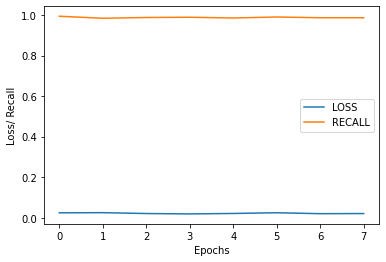

In [119]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall_2'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [120]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])

6/6 [==============================] - 0s 5ms/step - loss: 0.0911 - recall_2: 0.9783
Validation Loss:  0.09108889102935791
6/6 [==============================] - 0s 4ms/step - loss: 0.0911 - recall_2: 0.9783
Validation Recall:  0.97826087474823


In [121]:
y_pred = model.predict(X_test)

y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0
y_pred = y_pred.astype("int")
y_pred = encoder.inverse_transform(y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


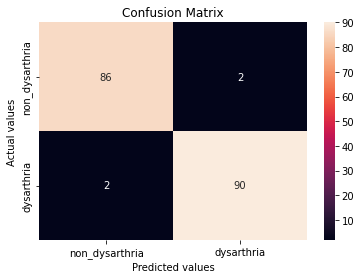

In [123]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred)
categories = list(df['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [124]:
print("F1-score of model 1: ", f1_score((y_test), encoder.transform(y_pred)))

F1-score of model 1:  0.9782608695652174


##Model 2 (Adam Optimizer - Learning Rate = 0.001, Beta 1 = 0.85, Beta 2 = 0.9)

In [104]:
adam2 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.85, beta_2=0.9)

In [105]:
model.compile(optimizer=adam2, loss='binary_crossentropy', metrics=metrics)

In [106]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/100
51/51 [==============================] - 2s 16ms/step - loss: 0.0251 - recall_1: 0.9890 - val_loss: 0.1130 - val_recall_1: 0.9802
Epoch 2/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0307 - recall_1: 0.9814 - val_loss: 0.0983 - val_recall_1: 0.9901
Epoch 3/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0348 - recall_1: 0.9802 - val_loss: 0.0861 - val_recall_1: 0.9901
Epoch 4/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0242 - recall_1: 0.9913 - val_loss: 0.0647 - val_recall_1: 0.9901
Epoch 5/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0273 - recall_1: 0.9814 - val_loss: 0.0932 - val_recall_1: 1.0000
Epoch 6/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0175 - recall_1: 0.9963 - val_loss: 0.1218 - val_recall_1: 0.9901
Epoch 7/100
51/51 [==============================] - 1s 10ms/step - loss: 0.0235 - recall_1: 0.9913 - val_loss: 0.2053 - val_recall_1: 0.9901


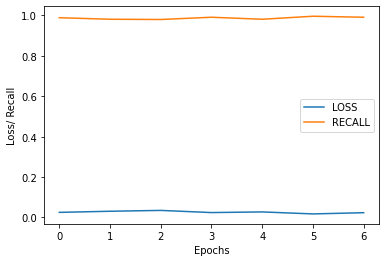

In [109]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall_1'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [110]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.2254 - recall_1: 0.9674
Validation Loss:  0.2253565639257431
6/6 [==============================] - 0s 4ms/step - loss: 0.2254 - recall_1: 0.9674
Validation Recall:  0.967391312122345
6/6 [==============================] - 0s 4ms/step - loss: 0.2254 - recall_1: 0.9674


[0.2253565639257431, 0.967391312122345]

In [111]:
y_pred2 = model.predict(X_test)

y_pred2[y_pred2>=0.5] = 1
y_pred2[y_pred2<0.5] = 0
y_pred2 = y_pred2.astype("int")
y_pred2 = encoder.inverse_transform(y_pred2)

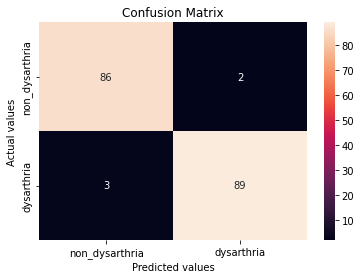

In [113]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred2)
categories = list(df['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [114]:
print("F1-score of model 2: ", f1_score((y_test), encoder.transform(y_pred2)))

F1-score of model 2:  0.9726775956284153


##Model 3 (Adam Optimizer - Learning Rate = 0.01, Beta 1 = 0.9, Beta 2 = 0.95)

In [125]:
adam3 = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.95)

In [126]:
model.compile(optimizer=adam3, loss='binary_crossentropy', metrics=metrics)

In [127]:
history = model.fit(X_train, y_train, epochs=500, callbacks=[callback_], validation_data=(X_val, y_val))

Epoch 1/500
51/51 [==============================] - 2s 16ms/step - loss: 0.5659 - recall_2: 0.6908 - val_loss: 0.2483 - val_recall_2: 0.8416
Epoch 2/500
51/51 [==============================] - 1s 10ms/step - loss: 0.3678 - recall_2: 0.6840 - val_loss: 0.2589 - val_recall_2: 0.8812
Epoch 3/500
51/51 [==============================] - 1s 10ms/step - loss: 0.3828 - recall_2: 0.8810 - val_loss: 0.1051 - val_recall_2: 0.9703
Epoch 4/500
51/51 [==============================] - 1s 12ms/step - loss: 0.2335 - recall_2: 0.9021 - val_loss: 0.1041 - val_recall_2: 0.9406
Epoch 5/500
51/51 [==============================] - 1s 10ms/step - loss: 0.1996 - recall_2: 0.9356 - val_loss: 0.1489 - val_recall_2: 0.9208
Epoch 6/500
51/51 [==============================] - 1s 11ms/step - loss: 0.1226 - recall_2: 0.9542 - val_loss: 0.1292 - val_recall_2: 1.0000
Epoch 7/500
51/51 [==============================] - 1s 10ms/step - loss: 0.1037 - recall_2: 0.9517 - val_loss: 0.0903 - val_recall_2: 0.9802
Epoch 

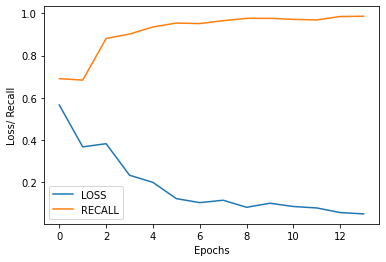

In [128]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['recall_2'], label="RECALL")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Recall')

plt.legend(loc='best')
plt.show()

In [129]:
print("Validation Loss: ", model.evaluate(X_test, y_test)[0])
print("Validation Recall: ", model.evaluate(X_test, y_test)[1])
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 7ms/step - loss: 0.1022 - recall_2: 0.9891
Validation Loss:  0.10222065448760986
6/6 [==============================] - 0s 9ms/step - loss: 0.1022 - recall_2: 0.9891
Validation Recall:  0.989130437374115
6/6 [==============================] - 0s 8ms/step - loss: 0.1022 - recall_2: 0.9891


[0.10222065448760986, 0.989130437374115]

In [130]:
y_pred3 = model.predict(X_test)

y_pred3[y_pred3>=0.5] = 1
y_pred3[y_pred3<0.5] = 0
y_pred3 = y_pred3.astype("int")
y_pred3 = encoder.inverse_transform(y_pred3)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


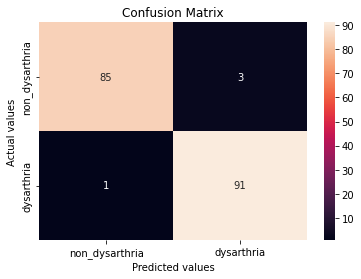

In [131]:
# Confusion matrix
cf_matrix = confusion_matrix(encoder.inverse_transform(y_test), y_pred3)
categories = list(df['is_dysarthria'].unique())
sns.heatmap(cf_matrix, annot = True, fmt = '', xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title ("Confusion Matrix")
plt.show()

In [132]:
print("F1-score of model 3: ", f1_score((y_test), encoder.transform(y_pred3)))

F1-score of model 3:  0.9784946236559139


# Prediction:
Keeping the beta 1 and beta 2 constant, when the learning rate of the data was changed the separation of recall and loss changed significantly.
but when the beta 1 and beta 2 was changed keeping the learning rate as constant the separation werent effected that much. 